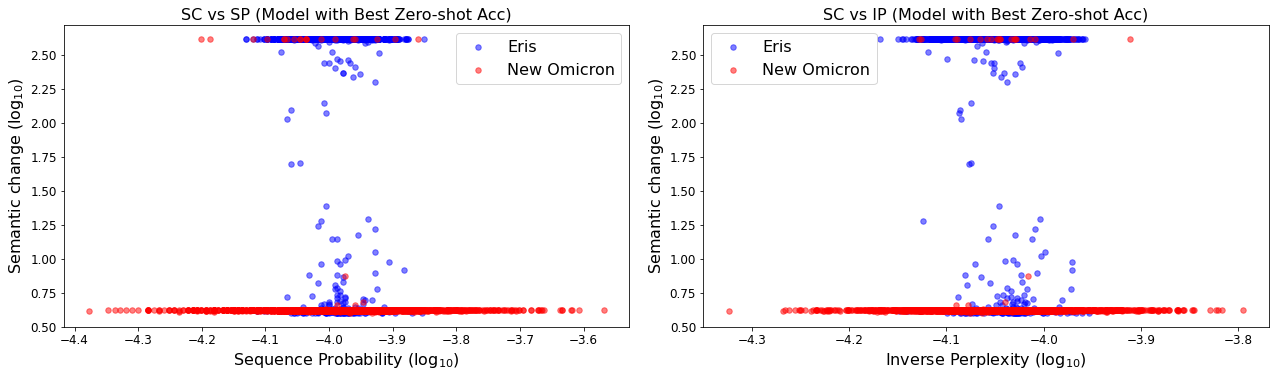

In [19]:
import pandas as pd
from transformers import RobertaTokenizerFast, RobertaForMaskedLM, RobertaModel
import torch
import os
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from transformers import RobertaForMaskedLM, RobertaModel, RobertaConfig

# Load the SentenceTransformer model
CHECKPOINT="4"
DISTANCE="L2" # L1 for Manhattan distance, L2 for Euclidean distance
if CHECKPOINT == "X":
    CP_TITLE = "(Model without Contrastive Learning)"
elif CHECKPOINT == "4":
    CP_TITLE = "(Model with Best Zero-shot Acc)"
else:
    CP_TITLE = "(Model with Best Test Acc)"

# Reading the data
df_eris_cscs = pd.read_csv(f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_values_eris.csv")
df_new_cscs = pd.read_csv(f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_values_new.csv")

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting Semantic Change vs Grammaticality
axes[0].scatter(df_eris_cscs["log10(grammaticality)"], df_eris_cscs["log10(semantic_change)"], color='blue', alpha=0.5, s=30, label='Eris')
axes[0].scatter(df_new_cscs["log10(grammaticality)"], df_new_cscs["log10(semantic_change)"], color='red', alpha=0.5, s=30, label='New Omicron')
axes[0].set_xlabel("Sequence Probability (log$_{10}$)", fontsize=16)
axes[0].set_ylabel("Semantic change (log$_{10}$)", fontsize=16)
axes[0].legend()
axes[0].set_title(f"SC vs SP {CP_TITLE}", fontsize=16)

# Plotting Semantic Change vs log10(1/Perplexity)
axes[1].scatter(df_eris_cscs["log10(1/perplexity)"], df_eris_cscs["log10(semantic_change)"], color='blue', alpha=0.5, s=30, label='Eris')
axes[1].scatter(df_new_cscs["log10(1/perplexity)"], df_new_cscs["log10(semantic_change)"], color='red', alpha=0.5, s=30, label='New Omicron')
axes[1].set_xlabel("Inverse Perplexity (log$_{10}$)", fontsize=16)
axes[1].set_ylabel("Semantic change (log$_{10}$)", fontsize=16)
axes[1].legend()
axes[1].set_title(f"SC vs IP {CP_TITLE}", fontsize=16)

# Font size settings
font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size-4)
plt.rc('ytick', labelsize=font_size-4)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

# Overall title
if CHECKPOINT == "X":
    MODEL = "CoV-RoBERTa without Contrastive Learning"
elif CHECKPOINT == "4":
    MODEL = "CoV-SNN Transformer with Best Zero-shot Acc"
else:
    MODEL = "CoV-SNN Transformer with Best Test Acc"
#plt.suptitle(f"Semantic Change Analysis ({MODEL})", fontsize=font_size)

# Layout and saving the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig_file_name = f"outputs/cscs_CP{CHECKPOINT}_{DISTANCE}/cscs_CP{CHECKPOINT}_{DISTANCE}.pdf"
plt.savefig(fig_file_name)
plt.show()